In [1]:
# Inference Notebook – Mean Reversion Model (GRU-based)

#This notebook demonstrates how to load the trained GRU model (`model.h5`), process the test dataset, and make predictions. We'll compare predicted labels with ground truth and visualize some results.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load functions from existing code
from models.models import load_and_preprocess_data, create_sequences


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [3]:
# Paths to data
price_path = "archive/prices-split-adjusted.csv"
sentiment_path = "sentiment_scores.csv"

# Load and preprocess
df = load_and_preprocess_data(price_path, sentiment_path)

# Create sequences
sequence_length = 30
X, y = create_sequences(df, sequence_length=sequence_length)

# Split into train and test
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [4]:
# Load trained model
model = tf.keras.models.load_model("model.h5")

# Confirm structure
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │         8,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,603 (33.61 KB)

 Trainable params: 8,601 (33.60 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [5]:
# Run inference
pred_probs = model.predict(X_test)
pred_labels = (pred_probs > 0.5).astype(int)

# Accuracy
accuracy = np.mean(pred_labels.flatten() == y_test)
print(f"Test Accuracy: {accuracy:.4f}")


5319/5319 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
Test Accuracy: 0.9143


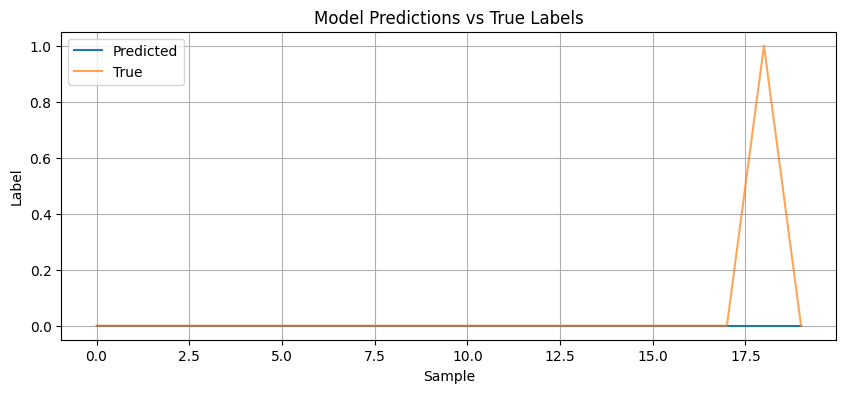

In [6]:
# predictions vs ground truth
n_samples = 20
plt.figure(figsize=(10, 4))
plt.plot(pred_labels[:n_samples], label="Predicted")
plt.plot(y_test[:n_samples], label="True", alpha=0.7)
plt.title("Model Predictions vs True Labels")
plt.xlabel("Sample")
plt.ylabel("Label")
plt.legend()
plt.grid(True)
plt.show()
